In this notebook I defined the functions I have built to take care of the preprocessing of the dataset. The dataset is not massive, therefore, I am not going to implement advanced tools like Tensor Flow Extended to build the pipeline.  

The data that I have gathered by recording myself is aready labeled, and I can trust the labeling because of the way that I have acquired it (I have worked my way through the alphabet one letter at a time recording the signs individually). These are the transformations that I decided that were indipensable improve the quality of the data:
1. Using a different landmark coordinate system, I centered the nodes around the node 0. Initially they were arranged using one corner of the display (of video recorded with the webcam) as the origin. Using a landmark brings more consistency and improves the predictive value of the samples. The distance of the landmarks to a corner of the display does not have anything to do with the meaning of the sign.  

2. Normalizing the samples, when I recorded myself I could not us a fixed webcam-hand distance. All the samples are going to be scaled to 1x1. 

### Function to change the origin of the coordinates:

It takes the X (features) as an argument and substracts the vertical and horizontal coordinates from  the rest of the coordinates.

In [1]:
def change_origin(X):
    
    x0 = X['x0'].copy()
    y0 = X['y0'].copy()
    counter = 0
    
    for column in X.columns:
        
        if counter%2 == 0:
            X.loc[:,column] -= x0 #loc is faster, it computes the whole column at once instead of one row at a time
        else:
            X.loc[:,column] -= y0
        counter +=  1

    return X

### Function to normalize the landmarks into a 1 by 1 square:

I am not performing a normalization over the dataset. I am normalizing sample by sample, this is: getting the x_max, y_max, x_min, and y_min **of each sample** and normalize the coordinates vertically and horizontally. 

#### To normalize a sample

In [2]:
def normalize_pos(pos):
    
    x_coords_list, y_coords_list = separate_x_y(pos)
    max_x = max(x_coords_list)
    min_x = min(x_coords_list)
    max_y = max(y_coords_list)
    min_y = min(y_coords_list)
    
    for i in range(len(pos)):
        if i%2==0:
            pos[i] = (pos[i]- min_x)/(max_x-min_x)
        else:
            pos[i] = (pos[i]- min_y)/(max_y-min_y)    
        
    return pos


#### To normalize the dataset 

In [3]:
def normalize_dataset(X):
    
    X_normalized = X.copy()
    
    for i in range(len(X)):
        X_normalized.iloc[i] = normalize_pos(X.iloc[i])
        
    return X_normalized

To visualize the effects of normalization (sanmplewise) and the change of origin I built a function to visualize the landmarks

### Function to visualize a sample:

In [4]:
def plot_landmarks(pos, scaled:bool, normalized:bool): # In case of ploting more than one sample in the same show() I would use multiple
    
    x_coords_list, y_coords_list = separate_x_y(pos) #pos is a list of coordinates i need to split it for the plot
    scatter_plot(normalized, scaled, x_coords_list, np.array(y_coords_list)*-1)
    lines_plot(x_coords_list, np.array(y_coords_list)*-1)
    
    plt.show()
    
#function to split the pos list into 2 lists for the vertical and horizontal coordinates        
def separate_x_y(pos):
    
    x = [] 
    y = [] 
    counter =0
    
    for i in pos:
        if counter%2==0:
            x.append(i)
        else: y.append(i)
        counter += 1
        
    return x, y


def scatter_plot(normalized:bool, scaled:bool, x_coords_list, y_coords_list):
    plt.scatter(x_coords_list, y_coords_list, s=40)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Hand-Landmarks')
    
    if normalized:
        plt.xlim([0, max(x_coords_list)])
        plt.ylim([0, max(y_coords_list)])
    else:
        plt.xlim([-700,700])
        plt.ylim([-700, 700])
        
    if scaled:
        plt.axis('equal')
    else: pass
            


def lines_plot(x_coords_list, y_coords_list):
    
    pairs = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [5,9], 
             [9,10], [10,11], [11,12], [9,13], [13,14], [14,15], [15,16], [13,17],
             [17,18], [18,19], [19,20], [0,17]]
    
    for points in pairs:
        A_index = points[0]
        B_index = points[1]
        x_coords = [x_coords_list[A_index], x_coords_list[B_index]]
        y_coords = [y_coords_list[A_index], y_coords_list[B_index]]
        plt.plot(x_coords, y_coords, linewidth = 3)
        
             

Let's visualize a sample

#### 1. Raw sample before any change 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [6]:
raw_dataset_df = pd.read_csv('datasets/raw_dataset.csv') #import dataset
raw_dataset_df.head()

,label,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,1,582.0,458.0,517.0,457.0,469.0,424.0,460.0,380.0,477.0,...,562.0,378.0,590.0,354.0,586.0,329.0,589.0,360.0,591.0,375.0
1,1,557.0,428.0,497.0,407.0,458.0,371.0,434.0,334.0,431.0,...,513.0,306.0,555.0,318.0,543.0,282.0,537.0,285.0,538.0,295.0
2,1,550.0,391.0,499.0,358.0,468.0,326.0,444.0,297.0,427.0,...,494.0,237.0,541.0,296.0,529.0,262.0,523.0,244.0,519.0,234.0
3,1,499.0,281.0,439.0,275.0,393.0,245.0,374.0,202.0,378.0,...,472.0,212.0,507.0,187.0,491.0,155.0,494.0,189.0,500.0,204.0
4,1,489.0,275.0,428.0,268.0,385.0,237.0,365.0,194.0,364.0,...,461.0,201.0,495.0,179.0,484.0,144.0,486.0,176.0,490.0,193.0


In [23]:
np.random.seed(3)
random_index = np.random.randint(0, len(raw_dataset_df), 1)[0]
print(f'Label:{raw_dataset_df.iloc[random_index, 0]}')

Label:5


(The random sample that we have chosen is the E (label=5))  

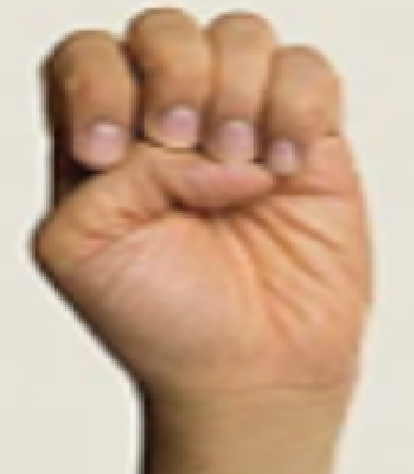

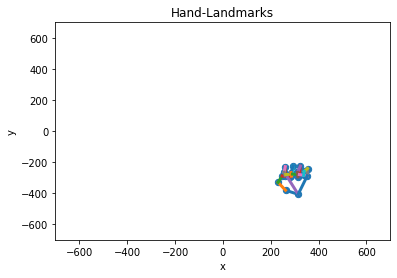

Label:5


In [8]:
plot_landmarks(raw_dataset_df.iloc[random_index, 1:], False, False)

You have to understand that image as the display of the frame when that sign was captured.

In [18]:
X = raw_dataset_df.iloc[:, 1:]
X_normalized = normalize_dataset(X)
print(X_normalized.head())

         x0   y0        x1        y1        x2        y2        x3        y3  \
0  0.931298  1.0  0.435115  0.992857  0.068702  0.757143  0.000000  0.442857   
1  1.000000  1.0  0.523810  0.856164  0.214286  0.609589  0.023810  0.356164   
2  1.000000  1.0  0.585366  0.789809  0.333333  0.585987  0.138211  0.401274   
3  0.939850  1.0  0.488722  0.954198  0.142857  0.725191  0.000000  0.396947   
4  0.954198  1.0  0.488550  0.948529  0.160305  0.720588  0.007634  0.404412   

         x4        y4  ...       x16       y16       x17       y17       x18  \
0  0.129771  0.264286  ...  0.778626  0.428571  0.992366  0.257143  0.961832   
1  0.000000  0.136986  ...  0.650794  0.164384  0.984127  0.246575  0.888889   
2  0.000000  0.229299  ...  0.544715  0.019108  0.926829  0.394904  0.829268   
3  0.030075  0.137405  ...  0.736842  0.473282  1.000000  0.282443  0.879699   
4  0.000000  0.139706  ...  0.740458  0.455882  1.000000  0.294118  0.916031   

        y18       x19       y19       

Notice how the 2 coordinates of the first landmark are nule now, we can drop those features, they don't contribute any information.

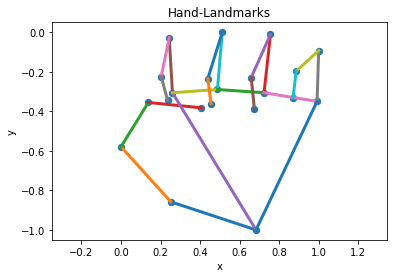

In [21]:
plot_landmarks(X_normalized.iloc[random_index, 0:], True, False)

Maybe this preprocessing seems unnecessary but I think that it simplifies the complexity of the model needed to deal with the task. Imagine using a Random Forest, it does not understand the location of the hand in the display as we may think. It will struggle to get the understanding that the same sign in one part of the screen and in other means the same thing, same thing for the proximity of the hand to the webcam. the displayb has been reduced to an square of 1 by 1 now, where the hand is almost perfectly centered.  

If we change the origin to the 0 landmark, the x0 and y0 features will be null. We will reduce the dimensionality of the feature space.

In [24]:
X_normalized_and_centered = change_origin(X_normalized)
print(X_normalized_and_centered.head())

    x0   y0        x1        y1        x2        y2        x3        y3  \
0  0.0  0.0 -0.496183 -0.007143 -0.862595 -0.242857 -0.931298 -0.557143   
1  0.0  0.0 -0.476190 -0.143836 -0.785714 -0.390411 -0.976190 -0.643836   
2  0.0  0.0 -0.414634 -0.210191 -0.666667 -0.414013 -0.861789 -0.598726   
3  0.0  0.0 -0.451128 -0.045802 -0.796992 -0.274809 -0.939850 -0.603053   
4  0.0  0.0 -0.465649 -0.051471 -0.793893 -0.279412 -0.946565 -0.595588   

         x4        y4  ...       x16       y16       x17       y17       x18  \
0 -0.801527 -0.735714  ... -0.152672 -0.571429  0.061069 -0.742857  0.030534   
1 -1.000000 -0.863014  ... -0.349206 -0.835616 -0.015873 -0.753425 -0.111111   
2 -1.000000 -0.770701  ... -0.455285 -0.980892 -0.073171 -0.605096 -0.170732   
3 -0.909774 -0.862595  ... -0.203008 -0.526718  0.060150 -0.717557 -0.060150   
4 -0.954198 -0.860294  ... -0.213740 -0.544118  0.045802 -0.705882 -0.038168   

        y18       x19       y19       x20       y20  
0 -0.921429  0

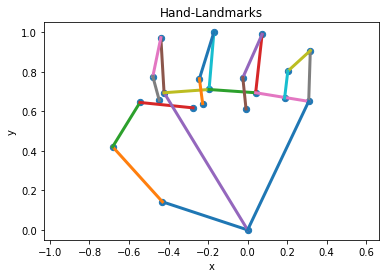

In [25]:
plot_landmarks(X_normalized_and_centered.iloc[random_index, 0:], True, True)

As you can see now we the origin (0,0) is the landmark 0.

In [26]:
X_normalized_and_centered = change_origin(X_normalized_and_centered)
print(X_normalized_and_centered.head())
dataset_preprocessed_df = X_normalized_and_centered.copy()
dataset_preprocessed_df['label'] = raw_dataset_df['label'].copy()
dataset_preprocessed_df.to_csv('datasets/preprocessed_dataset.csv')


    x0   y0        x1        y1        x2        y2        x3        y3  \
0  0.0  0.0 -0.496183 -0.007143 -0.862595 -0.242857 -0.931298 -0.557143   
1  0.0  0.0 -0.476190 -0.143836 -0.785714 -0.390411 -0.976190 -0.643836   
2  0.0  0.0 -0.414634 -0.210191 -0.666667 -0.414013 -0.861789 -0.598726   
3  0.0  0.0 -0.451128 -0.045802 -0.796992 -0.274809 -0.939850 -0.603053   
4  0.0  0.0 -0.465649 -0.051471 -0.793893 -0.279412 -0.946565 -0.595588   

         x4        y4  ...       x16       y16       x17       y17       x18  \
0 -0.801527 -0.735714  ... -0.152672 -0.571429  0.061069 -0.742857  0.030534   
1 -1.000000 -0.863014  ... -0.349206 -0.835616 -0.015873 -0.753425 -0.111111   
2 -1.000000 -0.770701  ... -0.455285 -0.980892 -0.073171 -0.605096 -0.170732   
3 -0.909774 -0.862595  ... -0.203008 -0.526718  0.060150 -0.717557 -0.060150   
4 -0.954198 -0.860294  ... -0.213740 -0.544118  0.045802 -0.705882 -0.038168   

        y18       x19       y19       x20       y20  
0 -0.921429  0